In [1]:
import math
import random
from collections import defaultdict
from pprint import pprint
from collections import Counter
from nltk.corpus import stopwords
import re
import string
import nltk

# Prevent future/deprecation warnings from showing in output
import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set global styles for plots
sns.set_style(style='white')
sns.set_context(context='notebook', font_scale=1.3, rc={'figure.figsize': (16,9)})

In [2]:
data=pd.read_csv('C:/Users/Dell/OneDrive/Documents/minor/7282_1.csv')
data.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [3]:
review=pd.DataFrame(data.groupby('reviews.rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review.head()

,reviews.rating,No of Users
0,5.0,12671
1,4.0,9755
2,3.0,5708
3,1.0,3068
4,2.0,2979


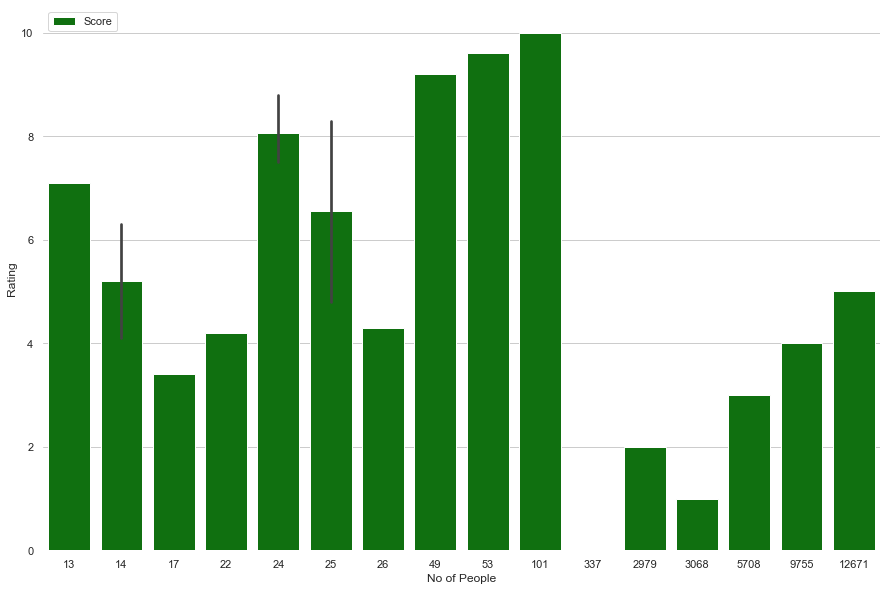

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 10))
sns.set_color_codes("pastel") 
sns.barplot(y="reviews.rating", x="No of Users", data=review.iloc[:20, :10],label="Score", color="green")

ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(xlabel="No of People",ylabel="Rating") 
sns.despine(left=True, bottom=True)
plt.show()

In [6]:
df=data[['reviews.text','reviews.rating']]
df.head()

,reviews.text,reviews.rating
0,Pleasant 10 min walk along the sea front to th...,4.0
1,Really lovely hotel. Stayed on the very top fl...,5.0
2,Ett mycket bra hotell. Det som drog ner betyge...,5.0
3,We stayed here for four nights in October. The...,5.0
4,We stayed here for four nights in October. The...,5.0


In [7]:
df=df.dropna()
df[df['reviews.rating'] != 3]
df['labels'] = np.where(df['reviews.rating'] > 2, 1, 0)
df.head()

,reviews.text,reviews.rating,labels
0,Pleasant 10 min walk along the sea front to th...,4.0,1
1,Really lovely hotel. Stayed on the very top fl...,5.0,1
2,Ett mycket bra hotell. Det som drog ner betyge...,5.0,1
3,We stayed here for four nights in October. The...,5.0,1
4,We stayed here for four nights in October. The...,5.0,1


In [8]:
df.tail()

,reviews.text,reviews.rating,labels
35907,Best of the Best!!!! My family and I stayed in...,5.0,1
35908,Amazing Vacation in Beautiful Cabin We stayed ...,5.0,1
35909,My husband and I stayed at Tree Tops which is ...,5.0,1
35910,to share your opinion of this businesswith YP ...,0.0,0
35911,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx,0.0,0


In [9]:
stop = set(stopwords.words('english'))

In [10]:
def clean_document(doco):
    punctuation = string.punctuation
    punc_replace = ''.join([' ' for s in punctuation])
    doco_link_clean = re.sub(r'http\S+', '', doco)
    doco_clean_and = re.sub(r'&\S+', '', doco_link_clean)
    doco_clean_at = re.sub(r'@\S+', '', doco_clean_and)
    doco_clean = doco_clean_at.replace('-', ' ')
    doco_alphas = re.sub(r'\W +', ' ', doco_clean)
    trans_table = str.maketrans(punctuation, punc_replace)
    doco_clean = ' '.join([word.translate(trans_table) for word in doco_alphas.split(' ')])
    doco_clean = doco_clean.split(' ')
    p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    doco_clean = [word.lower() for word in doco_clean if len(word) > 2]
    doco_clean = ([i for i in doco_clean if i not in stop])
#     doco_clean = [spell(word) for word in doco_clean]
#     p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
#     doco_clean = ([spell(k) for k in doco_clean])
    return doco_clean

In [11]:
review_clean = [clean_document(doc) for doc in df['reviews.text']]
sentences = [' '.join(r) for r in review_clean]

In [12]:
df['cleantext']=sentences
df.head()

,reviews.text,reviews.rating,labels,cleantext
0,Pleasant 10 min walk along the sea front to th...,4.0,1,pleasant min walk along sea front water bus re...
1,Really lovely hotel. Stayed on the very top fl...,5.0,1,really lovely hotel stayed top floor surprised...
2,Ett mycket bra hotell. Det som drog ner betyge...,5.0,1,ett mycket bra hotell det som drog ner betyget...
3,We stayed here for four nights in October. The...,5.0,1,stayed four nights october hotel staff welcomi...
4,We stayed here for four nights in October. The...,5.0,1,stayed four nights october hotel staff welcomi...


In [13]:
def top_words(data):
        words_list = data.split(' ')
        counts = Counter(words_list)
        top_words = counts.most_common(20)
        length_of_list = len(top_words)
        index = np.arange(length_of_list)
        print(top_words)
        count_values = [x[1] for x in top_words]
        count_words = [x[0] for x in top_words]
        fig = plt.figure(figsize = (16,9))
        bar_width = 0.4
        rects1 = plt.bar(index, count_values)
        plt.xticks(index + bar_width, count_words, rotation=0)
        plt.show()

Top words in Positive Sentiment
[('hotel', 14609), ('room', 14558), ('great', 9192), ('staff', 8991), ('stay', 8954), ('clean', 8694), ('nice', 7498), ('breakfast', 7351), ('good', 6528), ('friendly', 5205), ('comfortable', 4541), ('rooms', 4520), ('would', 4463), ('stayed', 3938), ('location', 3815), ('place', 3480), ('night', 3463), ('one', 3447), ('area', 3231), ('helpful', 3005)]


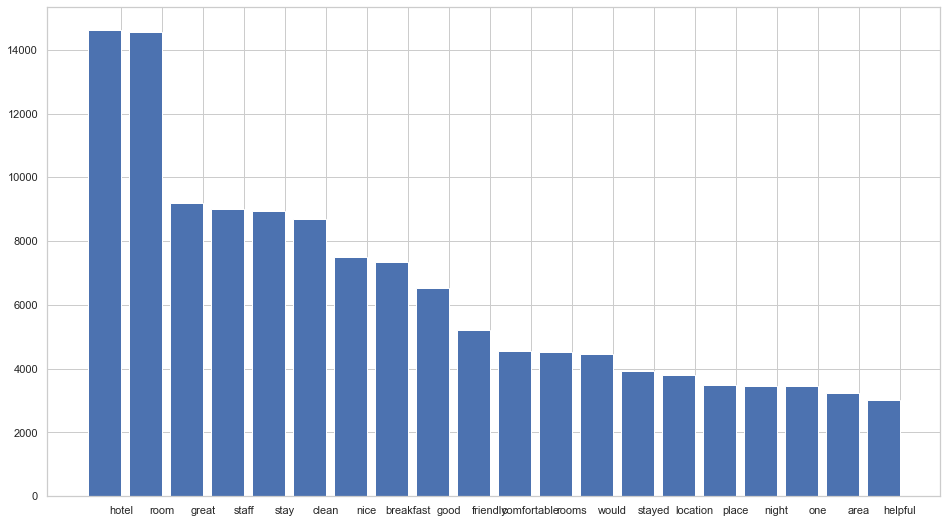

In [14]:
train_positive_sentiment = df[df.labels == 1]
positive_words = ' '.join(train_positive_sentiment['cleantext'])
print("Top words in Positive Sentiment")
top_words(positive_words)

Top words in Negative Sentiment
[('room', 5692), ('hotel', 3476), ('stay', 1831), ('would', 1398), ('night', 1294), ('one', 1245), ('rooms', 1179), ('desk', 1153), ('bed', 1138), ('front', 1041), ('like', 1030), ('staff', 1026), ('breakfast', 972), ('dirty', 967), ('place', 947), ('get', 917), ('clean', 912), ('could', 811), ('never', 781), ('door', 778)]


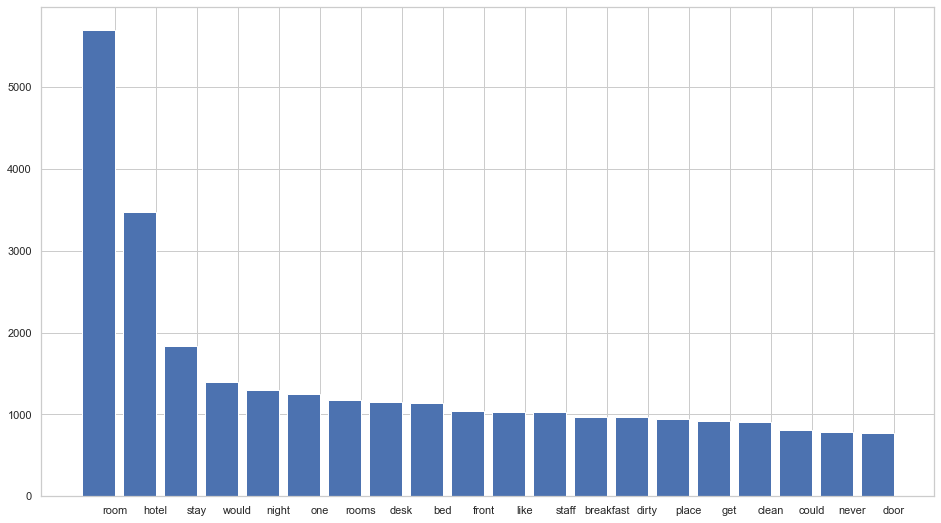

In [15]:
train_negative_sentiment = df[df.labels == 0]
negative_words = ' '.join(train_negative_sentiment['cleantext'])
print("Top words in Negative Sentiment")
top_words(negative_words)

In [16]:
from sklearn.model_selection import train_test_split

X = df.cleantext
y = df.labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=1000, binary=True)

X_train_vect = vect.fit_transform(X_train)

In [18]:
counts = df.labels.value_counts()
print(counts)

# print("\nPredicting only -1 = {:.2f}% accuracy".format(counts[-1] / sum(counts) * 100))

1    28646
0     6382
Name: labels, dtype: int64


In [19]:
#pip install imblearn

In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)

In [21]:
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))

[(0, 22900), (1, 22900)]


In [22]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train_res, y_train_res)

nb.score(X_train_res, y_train_res)

0.8512445414847162

In [23]:
X_test_vect = vect.transform(X_test)

y_pred = nb.predict(X_test_vect)

y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [24]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 84.71%

F1 Score: 90.25

COnfusion Matrix:
 [[ 981  279]
 [ 792 4954]]


In [25]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train_res, y_train_res)
ypred=model1.score(X_train_res, y_train_res)
ypred

0.8808296943231441

In [51]:
#a=nb.predict(vect.transform(['dirty rooms and beds are not align']))
a=nb.predict(vect.transform(['rooms are very beautiful and nice']))
#a= nb.predict(vect.transform(['bjoirj ido vhvhhhghghhghhv']))

In [53]:
if a==0:
    print('Negative')
elif(a==1):
    print("positive")


positive
